# Introduction to scikit-learn(sklearn)

- This notebook explains the most useful functions of scikit-learn library.



### Let's listify the contents


In [1]:
#Here we will be covering:

what_we_were_covering=(
"0. An end-to-end Scikit-learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make prediction on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save adn load a trained model",
"7. Put it all together!")

In [2]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

## 0. An end-to-end Scikit-learn workflow

### 1. Get the data ready

In [3]:
# fixing warrning issues

import warnings
warnings.filterwarnings("default")

In [4]:
# standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/akash/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# create x (feature matrix)

x = heart_disease.drop("target",axis=1) #removing target column

# create y (label)

y = heart_disease["target"] 

### 2.Choosing the right model and hyperparameters



In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params() # retrives the parameter of clf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.Fit the model into the training data


In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
clf.fit(x_train,y_train);

In [10]:
clf.fit(x_train,y_train)

RandomForestClassifier()

#### 3.1 Make a prediction

In [11]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3


In [12]:
# y_label = clf.predict(np.array([0,2,3,4])) // error

In [13]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

### 4.Evaluating the model on training data and test data

In [14]:
# on training data

clf.score(x_train,y_train)

1.0

In [15]:
# on test_data

clf.score(x_test,y_test)

0.8852459016393442

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[27,  5],
       [ 2, 27]])

In [18]:
accuracy_score(y_test,y_preds)

0.8852459016393442

### 5.Improve a model


In [19]:
## Try different amount of n_estimators 
np.random.seed()
for i in range(10,100,10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score (x_test,y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators.
Model accuracy on test set: 78.69%

Trying model with 20 estimators.
Model accuracy on test set: 90.16%

Trying model with 30 estimators.
Model accuracy on test set: 86.89%

Trying model with 40 estimators.
Model accuracy on test set: 86.89%

Trying model with 50 estimators.
Model accuracy on test set: 86.89%

Trying model with 60 estimators.
Model accuracy on test set: 90.16%

Trying model with 70 estimators.
Model accuracy on test set: 88.52%

Trying model with 80 estimators.
Model accuracy on test set: 86.89%

Trying model with 90 estimators.
Model accuracy on test set: 88.52%



### 6. Save a model and load it

In [20]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

/tmp/ipykernel_235436/845767007.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl","wb"))


In [21]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

/tmp/ipykernel_235436/3236450343.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))


0.8852459016393442

# 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels(usually `x` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values ( also called feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x = heart_disease.drop("target",axis=1) # axis =1 (row),axis=0(column)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split the data into training and test sets


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
x.shape

(303, 13)

In [28]:
len(heart_disease)

303

In [29]:
x.shape[0]*0.8

242.4

In [30]:
242+61

303

In [31]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

## 1.1 Make sure the data is in numerical

In [32]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv"
car_sales = pd.read_csv(url)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [34]:
len (car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
# Splitting into x and y

x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Splitting into train and test test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


### Building a machine learning model

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(x_train,y_train)
#model.score(x_test,y_test) // Errors since make and colour is not numerical

In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


#### Turning categories into numbers

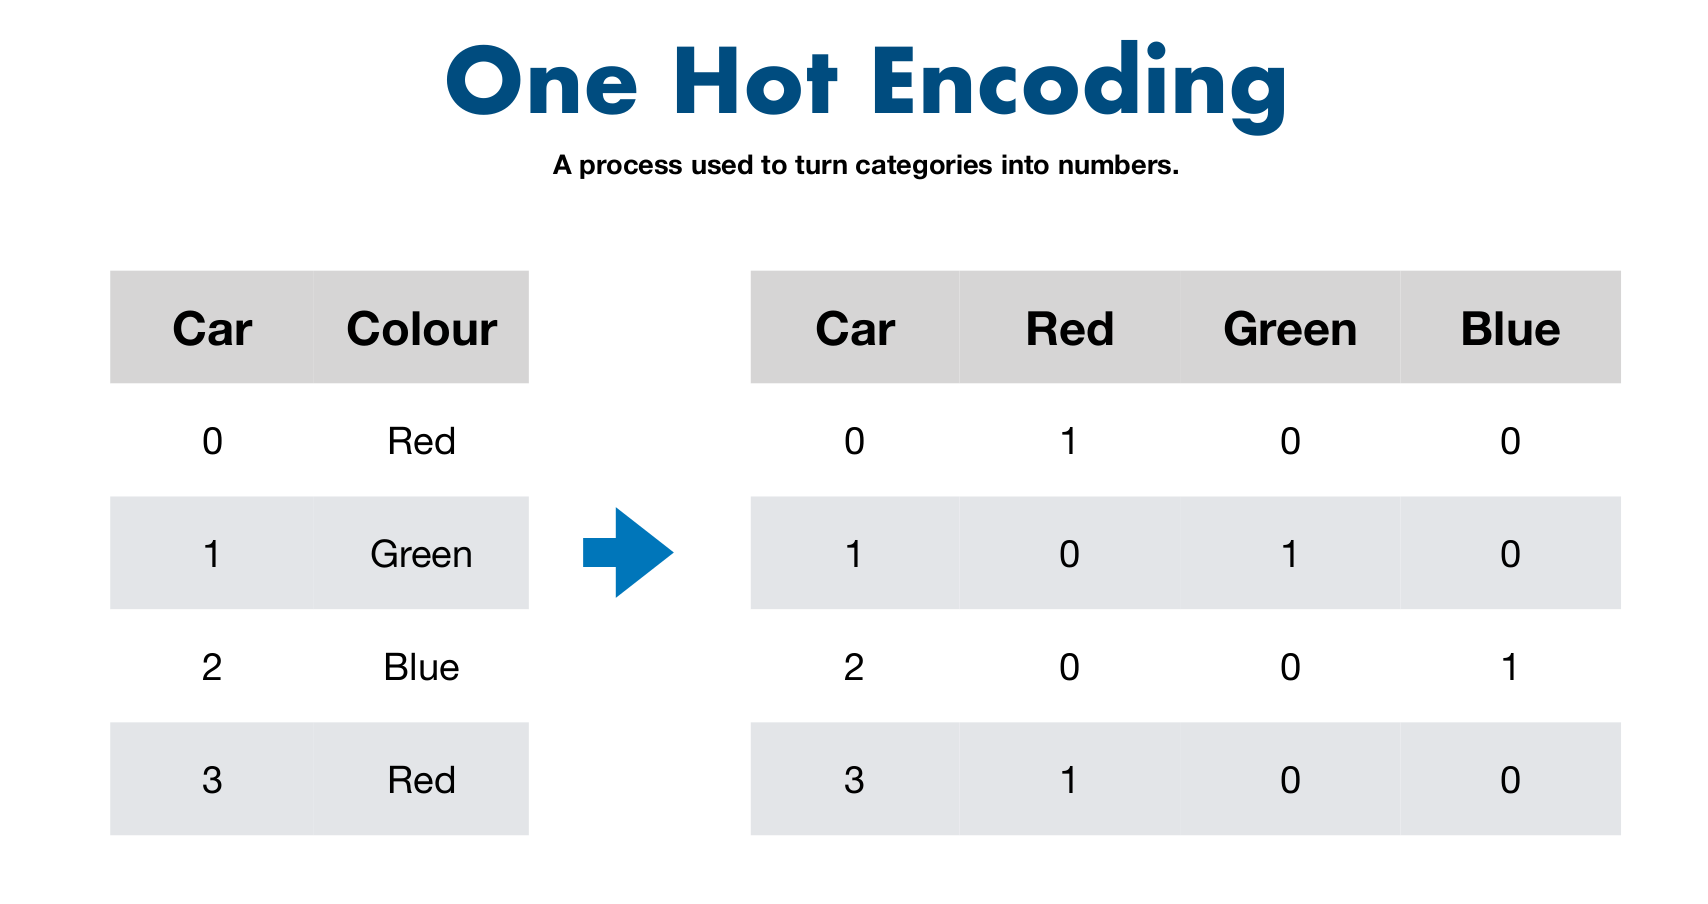

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # Making Doors as categorical features since door is int type
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
# Converting the tranformed_x to df

pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
# doing it in another way with  pd.get_dummies 

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [43]:
### Let's refit the model

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [45]:
model.score(x_test,y_test)

0.309099392450375

## 1.2 What if there were missing values?

    1. Fill them with some value (also known as imputation).
    2. Remove the samples with the missing data altogether.

In [46]:
# import car slaes missing data 

url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv"
car_sales_missing = pd.read_csv(url)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
# checking missing no.of.missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# create x and y

x = car_sales_missing.drop("Price",axis=1)
y = car_sales["Price"]

In [49]:
# converting data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

`OneHotEncoder can handle missing values/Nan values`

In [50]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [52]:
### Option 1: Filling missing data with pandas

#Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Doors" Column
car_sales_missing["Doors"].fillna(4,inplace=True)

#Fill the "Odometer (KM) Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)




In [53]:
#checking the datframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [54]:
# Removing rows with missing Price value

car_sales_missing.dropna(inplace=True)

In [55]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [56]:
len(car_sales_missing)

950

In [57]:
x = car_sales_missing.drop("Price",axis=1)
y= car_sales["Price"]

In [58]:
# converting data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

`The above step is optional,since the older version does'nt support the Nan/missing_values in OneHotencoder`

Read: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/26394916#overview

### Option 2: Filling Missing data and transforming categorical data with Scikit-learn

The main takeaways:
- Split the data 
- Fill/transform the training set and test set separately

In [59]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
# Drop the rows with no labels

car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# Split the data ointo x and y

x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# split data into train and test 

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
# checking the missing values

x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [64]:
# Fill the missing values with scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
# impute = filling

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns

cat_features= ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_transformer", cat_imputer , cat_features),
    ("door_imputer", door_imputer ,door_features),
    ("num_imputer", num_imputer ,num_features)
    ])

# fill train and test value separately 

filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

# check the filled x_train

filled_x_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [65]:
# Get our transformed data array's back into dataframe

car_sales_filled_train = pd.DataFrame(filled_x_train,
                                      columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test,
                                     columns=["Make","Colour","Doors","Odometer (KM)"])

# check missing data in training set

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
# check to see the original.. still the missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
# converting to non-numerical to numerical

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

# fill train and test values separately

transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test  = transformer.transform(car_sales_filled_test)

# check transformed and filled x_train

transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [68]:
# now we have transformed x , let's see if we can fit a the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and and one-hot encoded x data)

model.fit(transformed_x_train,y_train)
model.score(transformed_x_test,y_test)

0.21229043336119102

In [69]:
# check length of transformed data (filled and one-hot encoder) vs length of original data

len(transformed_x_train.toarray()) + len(transformed_x_test.toarray()), len(car_sales)

(950, 1000)

**Note:** The 50 less values in the transformed data is missing because we dropped the rows (50 total) with missing values in the price column.

# 2. Choosing the right estimator/algorithm for your problem 

Notes:

- sklearn refers to machine learning model,algorithms as estimators
- Classifcation problem - Predicting a category (heart disease or not)
    - Sometimes you'll see `clf`(short for classification) used as classification estimator
- Regression problem - predicting a number (selling price of car)

if you're working on machine learning model and looking to use sklearn and note sure what model should you use,
refer to the sklearn machine learning map:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [70]:
# Get california dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [71]:
# coverting thge dataset into dataframe

housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
# import algorithm/estimator

from sklearn.linear_model import Ridge


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440126

### Trying with ensemble algorithm

In [74]:
# import algorithm/estimator

from sklearn.ensemble import GradientBoostingRegressor


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.7755824521517651

In [75]:
# import algorithm/estimator

from sklearn.ensemble import RandomForestRegressor


# setup random seed

np.random.seed(42)

# create the data

x = housing_df.drop("target",axis=1)
y = housing_df["target"] 

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train,y_train)

#check the score of the model (on the test set)
model.score(x_test,y_test)

0.8066196804802649

## 2.1 Picking a machine learning model for classification problem

scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [76]:
# get the data

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
len(heart_disease)

303

Based on the sklearn map condition,it says `Linearsvc`

In [78]:
# import linearsvc estimators/algorithm class

from sklearn.svm import LinearSVC

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

# Evaluate LinearSVC
clf.score(x_test,y_test)

/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [79]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [80]:
# import Randomforestclassifer estimators/algorithm class

from sklearn.ensemble import RandomForestClassifier

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Randomclassifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate Randomclassifier
clf.score(x_test,y_test)

0.8524590163934426

 ### Tidbit:

1. If you have structured data, use ensemble methods.
2. If you unstructured data, use deep learning or transfer learning.

# 3.Fit the model/Algorithm on our data and use it to make predictions

## 3.1 Fitting the model into data
 Different names for:
- `x` = features,features variables,data
- `y` = labels,targets,targets variables

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
# import Randomforestclassifer estimators/algorithm class

from sklearn.ensemble import RandomForestClassifier

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Randomclassifier

clf = RandomForestClassifier()

# Fit the model to the data (training the machine leanring model)
clf.fit(x_train,y_train)

# Evaluate Random forest classifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [83]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [84]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

# 3.2 Making prediction using machine leanring models

2 ways of make predictions
1. `predict()`
2. `predict_proba()`

In [85]:
# use the trained model to make predictions

# clf.predict(np.array([1,2,3,4,5,6])) # this does'nt work

In [86]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [87]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [88]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [89]:
# compare the predictions to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean (y_preds == y_test)

0.8524590163934426

In [90]:
clf.score(x_test,y_test)

0.8524590163934426

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()` - use this if someone asks you "what's the probability of your model is assigning to each prediction?"

In [92]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [93]:
# let's predict on the same data...
clf.predict(x_test[:5]) # it takes values [0.11,0.51,0.57,0.16,0.82]

array([0, 1, 1, 0, 1])

In [94]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
 heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict` can also be used for regression models

In [96]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)


#create a data

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create a model instance

model = RandomForestRegressor()

# fit the modelto the data

model.fit(x_train,y_train)

# make predictions

y_preds = model.predict(x_test)

In [99]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [100]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [102]:
# compare the predictions to the truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


0.3265721842781009

In [103]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

Read through: https://scikit-learn.org/stable/modules/model_evaluation.html